In [1]:
import nltk
from gensim.models import Word2Vec
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, brown

from nltk import ngrams
from string import digits, punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

nltk.download('punkt') # tokenization
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatization
nltk.download('omw-1.4') # lemmatization
nltk.download('averaged_perceptron_tagger') # tagging
nltk.download('tagsets') # tagging
nltk.download('brown') # word2vec

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\pawst\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_d

## 2. Please familiarize yourself with the methods of text analysis (NLP: Natural Language Processing).
## The following English terms will be helpful in finding information:
- normalization
- cleaning
- tokenization
- stop word removal
- stemming
- lemmatization
- tagging
- N-grams

and the following representations:
- frequency encoding
- one-hot encoding
- TF-IDF
- continuous word representation
- word embeddings ( Word2Vec, GloVe, fastText).

Find the above text analysis methods in any Python API.

### Tokenization
#### Tokenization means splitting up strings of text into smaller pieces.

In [3]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."
print("Sample text: \n{}".format(text))
def tokenize(text: str, language: str = 'english') -> str:
    return word_tokenize(text, language)
tokenized_text = tokenize(text)
print("Tokenized text: \n{}".format(tokenized_text))
print("Splitted text: \n{}".format(text.split()))

Sample text: 
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Tokenized text: 
['These', 'are', 'short', ',', 'famous', 'texts', 'in', 'English', 'from', 'classic', 'sources', 'like', 'the', 'Bible', 'or', 'Shakespeare', '.', 'Some', 'texts', 'have', 'word', 'definitions', 'and', 'explanations', 'to', 'help', 'you', '.', 'Some', 'of', 'these', 'texts', 'are', 'written', 'in', 'an', 'old', 'style', 'of', 'English', '.', 'Try', 'to', 'understand', 'them', ',', 'because', 'the', 'English', '

### Stopwords removal
#### Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis.

In [4]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."
def remove_stopwords(text: str) -> str:
    return " ".join([word for word in str(text).split() if word not in stopwords.words('english')])
print("Text with stopwords:\n{}".format(text))
print("Text without stopwords:\n{}".format(remove_stopwords(text)))

Text with stopwords:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text without stopwords:
These short, famous texts English classic sources like Bible Shakespeare. Some texts word definitions explanations help you. Some texts written old style English. Try understand them, English speak today based great, great, great, great grandparents spoke before! Of course, texts originally written English. The Bible, example, translation. But well known English today, many express beautiful thoug

### Stemming
#### Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.
##### For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk.

In [5]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."

def stemming(text: str) -> str:
    return " ".join([PorterStemmer().stem(word) for word in text.split()])

print("Text before stemming:\n{}".format(text))
print("Text after stemming:\n{}".format(stemming(text)))

Text before stemming:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after stemming:
these are short, famou text in english from classic sourc like the bibl or shakespeare. some text have word definit and explan to help you. some of these text are written in an old style of english. tri to understand them, becaus the english that we speak today is base on what our great, great, great, great grandpar spoke before! of course, not all these text were origin written in english. the bibl

### Lemmatization
#### Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

In [29]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."

def lemmatization(text: str) -> str:
    return " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])

print("Text before lemmatization:\n{}".format(text))
print("Text after lemmatization:\n{}".format(lemmatization(text)))

Text before lemmatization:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after lemmatization:
These are short, famous text in English from classic source like the Bible or Shakespeare. Some text have word definition and explanation to help you. Some of these text are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparent spoke before! Of course, not all these text were originall

### Tagging
#### Tagging is an essential feature of text processing where we tag the words into grammatical categorization. We take help of tokenization and pos_tag function to create the tags for each word.

In [7]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."
def tagging(text: str) -> str:
    return  nltk.pos_tag(nltk.word_tokenize(text))

print("Text before tagging:\n{}".format(text))
print("Text after tagging:\n{}".format(tagging(text)))

Text before tagging:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after tagging:
[('These', 'DT'), ('are', 'VBP'), ('short', 'JJ'), (',', ','), ('famous', 'JJ'), ('texts', 'NN'), ('in', 'IN'), ('English', 'NNP'), ('from', 'IN'), ('classic', 'JJ'), ('sources', 'NNS'), ('like', 'IN'), ('the', 'DT'), ('Bible', 'NNP'), ('or', 'CC'), ('Shakespeare', 'NNP'), ('.', '.'), ('Some', 'DT'), ('texts', 'NNS'), ('have', 'VBP'), ('word', 'NN'), ('definitions', 'NNS'), ('and', 'CC'), ('explanatio

We can describe the meaning of each tag by using the following program which shows the in-built values.

In [8]:
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


### N-grams
#### N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document.
Thinking in the same lines, n-grams are classified into the following types, depending on the value that ‘n’ takes.

| n | term    |
|---|---------|
| 1 | unigram |
| 2 | bigram  |
| 3 | trigram |
| n | n-gram  |

In [16]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."
def n_gram(text: str, n: int = 2) -> None:
    n_grams = ngrams(text.split(), n)
    for n_gram in n_grams:
        print(n_gram)

print("Text:\n{}".format(text))
n_gram(text, 3)

Text:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
('These', 'are', 'short,')
('are', 'short,', 'famous')
('short,', 'famous', 'texts')
('famous', 'texts', 'in')
('texts', 'in', 'English')
('in', 'English', 'from')
('English', 'from', 'classic')
('from', 'classic', 'sources')
('classic', 'sources', 'like')
('sources', 'like', 'the')
('like', 'the', 'Bible')
('the', 'Bible', 'or')
('Bible', 'or', 'Shakespeare.')
('or', 'Shakespeare.', 'Some')
('Shakespeare.', 'Some', 'texts')
('Some', '

### Text Normalization
Text normalization includes:
- convert all letters of the string to one case(either lower or upper case),
- If numbers are essential to convert to words else remove all numbers,
- Remove punctuations, other formalities of grammar,
- Remove white spaces,
- Remove stop words,

In [28]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."

def normalize_text(text: str, delete_numbers: bool = True) -> str:
    normalized_text = text.lower()
    normalized_text = normalized_text.translate(normalized_text.maketrans('','', digits)) if delete_numbers is True else None
    normalized_text = normalized_text.translate(normalized_text.maketrans('','', punctuation))
    normalized_text = normalized_text.strip()
    return remove_stopwords(normalized_text)

print("Text before normalization:\n{}".format(text))
print("Text after normalization:\n{}".format(normalize_text(text)))

Text before normalization:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after normalization:
short famous texts english classic sources like bible shakespeare texts word definitions explanations help texts written old style english try understand english speak today based great great great great grandparents spoke course texts originally written english bible example translation well known english today many express beautiful thoughts


### Text cleaning
#### Preparing raw text for NLP so that machines can understand human language.
Steps:
- Normalize Text
- Remove Unicode Characters
- Perform Stemming and Lemmatization

In [31]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."

def cleaning_text(text: str, lemmatizing: bool = False) -> str:
    text = normalize_text(text, delete_numbers=True)
    text = text.encode("ascii", "ignore")
    text = text.decode()
    return lemmatization(text) if lemmatizing is True else stemming(text)

print("Text before cleaning:\n{}".format(text))
print("Text after cleaning:\n{}".format(cleaning_text(text, lemmatizing=True)))

Text before cleaning:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after cleaning:
short famous text english classic source like bible shakespeare text word definition explanation help text written old style english try understand english speak today based great great great great grandparent spoke course text originally written english bible example translation well known english today many express beautiful thought


### Frequency Encoding
### An encoding technique which encodes categorical feature values to their frequencies

### one-hot encoding

In [35]:
text = "These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts."
def sample_one_hot_encoding(text: str) -> None:
    text = tokenize(text)
    label_encoder = LabelEncoder()
    one_hot_encoder = OneHotEncoder(sparse=False)
    labelled_text = label_encoder.fit_transform(text)
    labelled_text = labelled_text.reshape(len(labelled_text), 1)
    one_hot_encoded = one_hot_encoder.fit_transform(labelled_text)
    print(one_hot_encoded)

print("Text before encoding:\n{}".format(text))
print("Text after encoding:")
sample_one_hot_encoding(text)

Text before encoding:
These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English. The Bible, for example, is a translation. But they are all well known in English today, and many of them express beautiful thoughts.
Text after encoding:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


###  TF-IDF
#### Convert a collection of raw documents to a matrix of TF-IDF features.

In [12]:
corpus = [
    'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print("Feature names: \n{}".format(vectorizer.get_feature_names()))
print("Matrix shape: \n{}".format(X.shape))
print("Matrix: \n{}".format(X))

Feature names: 
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Matrix shape: 
(4, 9)
Matrix: 
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


###  word embeddings ( Word2Vec, GloVe, fastText).
Is used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.

In [17]:
print("Word embedding with brown corpus")
w = Word2Vec(brown.sents())
print("Word2vec: \n {}".format(w))
print("Close words to word 'dance' are: \n{}".format(w.wv.most_similar('dance', topn=10)))

Word embedding with brown corpus
Word2vec: 
 Word2Vec(vocab=15173, vector_size=100, alpha=0.025)
Close words to word 'dance' are: 
[('friendly', 0.9611735939979553), ('instruction', 0.9560506343841553), ('unknown', 0.9556121826171875), ('jazz', 0.9519745111465454), ('mountain', 0.9515712261199951), ('pictures', 0.9512935876846313), ('frankfurter', 0.9506810903549194), ('cash', 0.9506062865257263), ('giants', 0.9505171775817871), ('adult', 0.9502913951873779)]


## 3. Please show example of text classification with neural network (might be sentimental).

Text classification on RNN

Dataset: **[Steam Game Review Dataset](https://www.kaggle.com/arashnic/game-review-dataset)**

In [3]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

## Load & Prepare data

In [31]:
df_data = pd.read_csv("./src/Steam reviews/train_gr/train.csv", error_bad_lines=False)
df_data.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [36]:
df_data.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion'], dtype='object')

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17316 entries, 0 to 17491
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17316 non-null  int64  
 1   title            17316 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17316 non-null  object 
 4   user_suggestion  17316 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 811.7+ KB


Check if dataset contains n/a

In [40]:
print(df_data.isna().sum())
df_data.dropna(inplace=True)
print(df_data.isna().sum())

review_id          0
title              0
year               0
user_review        0
user_suggestion    0
dtype: int64
review_id          0
title              0
year               0
user_review        0
user_suggestion    0
dtype: int64


### For sentiment analysis we only need reviews and sentiment

In [41]:
user_suggestion_set = set(df_data['user_suggestion'])
print("User suggestion values: \n{}".format(user_suggestion_set))

User suggestion values: 
{0, 1}


In [43]:
df_data.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [45]:
df_data = df_data.drop(columns=['review_id', 'title', 'year'])
df_data.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


### Setup input pipeline

In [49]:
X_train, X_test, y_train, y_test = train_test_split( df_data['user_review'], df_data['user_suggestion'], test_size=0.33, random_state=42, shuffle=True)

### Create the text encoder
The raw loaded text needs to be processed before it can be used in a model.

The simplest way to process text for training is using the TextVectorization layer.

This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's .adapt method:

In [53]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)

In [57]:
encoder.adapt(X_train)

In [58]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'and', 'a', 'game', 'you', 'of', 'i',
       'is', 'it', 'this', 'in', 'for', 'that', 'but', 'with', 'have',
       'are'], dtype='<U17')

Encoding example for better understanding

In [75]:
sample = df_data['user_review'].sample(n=1)
encoded_example = encoder(sample)[:3].numpy()
print("Example review before vectorization: \n{}".format(sample))
print("Example review after vectorization: \n{}".format(encoded_example))

Example review before vectorization: 
5463    I would recommend this game a lot, it is fun a...
Name: user_review, dtype: object
Example review after vectorization: 
[[  9  68 130  12   6   5  97  11  10  52   4 527   1  36  56 430  10  61
   30  13   5 331 302   1 276  14 511   4  74   2   6   1   7  13 293   5
  331 230 838 276  88   2 543 205   9 167   3 139   4   9 212 106   5  43
   61   9  39  13   5 331 230 838 293 201 331 230 838   4  11 597  58  66
  382   1   3 249 750  16  15 140 276 606  58  13  51 337  88 217  15 223
    4 388  35   2  43   9  68   1 829  73   1 191   2   1 940  16  36 276
  585 568  74  66 248 789 488  36 276  68 172   1   4  11 585 498  21   2
  140  17  36   1   9   1   2   5 940  14 103 789   4  74  36 276  68   1
   13   1 652  12   6  10  84  16  11  49  21 268]]


In [97]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [77]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [79]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.00020554]
[-0.00020554]


In [98]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [100]:
batch_size = 100
lr = 0.01
epochs = 100

In [101]:
# checkpoint = ModelCheckpoint("reviews.h5",
#                              monitor="val_loss",
#                              mode="min",
#                              save_best_only = True,
#                              verbose=True,
#                              save_format='tf')

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = True,
                          restore_best_weights = True)

callbacks = [earlystop]

In [102]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    steps_per_epoch = len(X_train) // batch_size,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // batch_size,
                    callbacks=callbacks)

Epoch 1/100
116/116 [==============================] - 27s 174ms/step - loss: 0.6842 - accuracy: 0.4256 - val_loss: 0.6802 - val_accuracy: 0.4416

In [ ]:
model.save("reviews.h5", save_format=tf)

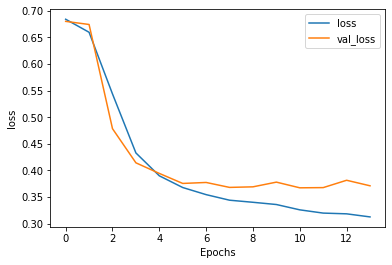

In [107]:
plot_graphs(history, 'loss')

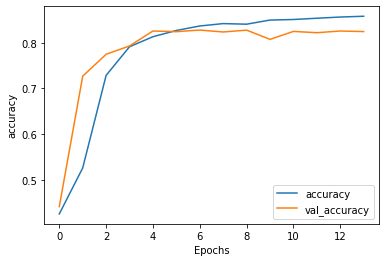

In [109]:
plot_graphs(history, 'accuracy')

### Test model

In [116]:
text = 'I dont know, this game was fun but too long'

In [117]:
predictions = model.predict(np.array([text]))
print(predictions)


[[-0.73480445]]


In [120]:
text = 'That game is just the worst, awful graphic, boring gameplay, not likeable characters'

In [121]:
predictions = model.predict(np.array([text]))
print(predictions)

[[-2.5947137]]


In [118]:
text = 'I had so much fun when playing this game, keep it up devs'

In [119]:
predictions = model.predict(np.array([text]))
print(predictions)

[[0.5703051]]


## 5. Please provide an example of text generation using a neural network.

### Text generation with an RNN
### Dataset: **[Internet news data with readers engagement](https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement)**

## Load & Prepare data

In [42]:
df_data = pd.read_csv("./src/Articles/articles_data.csv", error_bad_lines=False)
df_data.head()

# df_data = pd.read_csv("./src/Steam reviews/train_gr/train.csv", error_bad_lines=False)
# df_data.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [43]:
#df_data = df_data['user_review']
df_data = df_data['content']
df_data.head()

0    WASHINGTON (Reuters) - The National Transporta...
1    The States jobless rate fell to 5.2 per cent l...
2    Louise Kennedy is showing off her autumn-winte...
3    Han Kwang Song, the first North Korean footbal...
4                                                  NaN
Name: content, dtype: object

Check if dataset contains n/a

In [44]:
print(df_data.isna().sum())
df_data.dropna(inplace=True)
print(df_data.isna().sum())

1292
0


In [ ]:
df_data = df_data[:900]

In [46]:
len(df_data)

900

### Dataset cleaning

#### We only need to remove unicode characters, punctuations and upper case and tokenize!!!

In [51]:
def clean_text(txt: str) -> str:
    txt = "".join(v for v in txt if v not in punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

corpus = [clean_text(x) for x in df_data]
corpus[:10]

['washington reuters  the national transportation safety board said tuesday a tesla model s was in autopilot mode when it struck a fire truck in culver city california one of a series of crashes the board is investigating involving teslas driver assistance 478 chars',
 'the states jobless rate fell to 52 per cent last month according to the latest official figures this was higher than previously reported on account of an upward revision by the central statistics office cso one of several in the last two years\r\nnonethe 800 chars',
 'louise kennedy is showing off her autumnwinter collection in dublin tonight and the show will start with her glittering new take on black watch tartan\r\nsixteen models will present more than 60 ensembles to over 200 guests including the designers close frie 2156 chars',
 'han kwang song the first north korean footballer to score in the italian serie a league has joined reigning champions juventus on loan from cagliari\r\nhan signed a oneyear contract with

In [228]:
len(corpus)

300

Generating Sequence of N-gram Tokens

In [52]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus: str) -> tuple:
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    ## convert data to sequence of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[146, 34],
 [146, 34, 1],
 [146, 34, 1, 128],
 [146, 34, 1, 128, 1605],
 [146, 34, 1, 128, 1605, 562],
 [146, 34, 1, 128, 1605, 562, 313],
 [146, 34, 1, 128, 1605, 562, 313, 25],
 [146, 34, 1, 128, 1605, 562, 313, 25, 23],
 [146, 34, 1, 128, 1605, 562, 313, 25, 23, 2],
 [146, 34, 1, 128, 1605, 562, 313, 25, 23, 2, 1206]]

In [53]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

Create model

In [57]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()

    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))

    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.2))

    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')

    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 56, 10)            91940     
                                                                 
 lstm_3 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 9194)              928594    
                                                                 
Total params: 1,064,934
Trainable params: 1,064,934
Non-trainable params: 0
_________________________________________________________________


In [58]:
batch_size = 256
epochs = 90
history = model.fit(predictors, label, epochs=epochs, verbose=True, batch_size = batch_size)

Epoch 1/90
152/152 [==============================] - 3s 13ms/step - loss: 7.8483

In [69]:
model.save("generate_steam.h5")
np.save('generate_steam_history.npy', history.history)

[7.8483381271362305, 7.3246965408325195, 7.237493515014648, 7.1804022789001465, 7.124136447906494, 7.062501430511475, 7.002253532409668, 6.948122978210449, 6.882249355316162, 6.818183422088623, 6.743159294128418, 6.669766426086426, 6.595172882080078, 6.52578592300415, 6.4583740234375, 6.396589756011963, 6.329962730407715, 6.26262903213501, 6.19881010055542, 6.134857177734375, 6.067023277282715, 6.001275539398193, 5.932469367980957, 5.8630290031433105, 5.794051647186279, 5.728908538818359, 5.6646270751953125, 5.602841854095459, 5.538639068603516, 5.472512245178223, 5.40839147567749, 5.345937728881836, 5.286930084228516, 5.224209785461426, 5.163899898529053, 5.104971408843994, 5.0486979484558105, 4.988893508911133, 4.930844306945801, 4.873833656311035, 4.815743923187256, 4.763181209564209, 4.710183143615723, 4.655028820037842, 4.605156421661377, 4.548628807067871, 4.5059356689453125, 4.450364589691162, 4.400725364685059, 4.351081371307373, 4.301962375640869, 4.261051654815674, 4.20983743

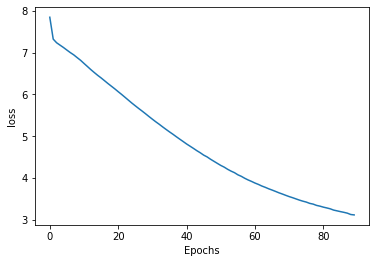

In [67]:
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show()

In [35]:
history.history

{'loss': [6.683719635009766,
  6.06643009185791,
  5.903054237365723,
  5.745211124420166,
  5.657052040100098,
  5.607508659362793,
  5.556715488433838,
  5.500366687774658,
  5.4488525390625,
  5.398335933685303,
  5.357101917266846,
  5.312225341796875,
  5.267070770263672,
  5.226165294647217,
  5.188296318054199,
  5.151060104370117,
  5.1132965087890625,
  5.078083038330078,
  5.041888236999512,
  5.004952907562256,
  4.968738555908203,
  4.9318623542785645,
  4.896208763122559,
  4.860759258270264,
  4.8206939697265625,
  4.783626556396484,
  4.74960994720459,
  4.708282470703125,
  4.671302318572998,
  4.635815143585205]}

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [20]:
def generate(text, n):
    for i in range(n):
        text_tokens = tokenizer.texts_to_sequences([text])
        text_tokens = pad_sequences(text_tokens, maxlen=max_sequence - 1, padding='pre')

        predicted = np.argmax(model.predict(text_tokens), axis=-1)

        text += " "
        for w, idx in tokenizer.word_index.items():
            if idx == predicted:
                text += w
                break

    return text.title()

In [65]:
max_sequence = max([len(x) for x in inp_sequences])
print(generate("I like watching ", 12))

I Like Watching  The New Direct Group Of A Young Event In The Centerleft Democratic


## 6. Please provide an example of text translation using a neural network.

The transformer package is provided by huggingface.io.

It tries to solve the various challenges we face in the NLP field;
it provides pre-trained models, tokenizers, configs, various APIs, ready-made pipelines for our
inference etc. The transformers package gives us the advantage of using pre-trained language models
along with their data-processing tools. Most of the models are provided to us directly and made
available in the library in PyTorch and TensorFlow.

Models:  **[HuggingFace Models](https://huggingface.co/models?pipeline_tag=translation)**

In [15]:
!pip install transformers[sentencepiece]

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

tokenizer = AutoTokenizer.from_pretrained('Helsinki-NLP/opus-mt-pl-en')
model = AutoModelForSeq2SeqLM.from_pretrained('Helsinki-NLP/opus-mt-pl-en')
translator = pipeline('translation', model = model, tokenizer = tokenizer)

Downloading:   0%|          | 0.00/815k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/767k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295M [00:00<?, ?B/s]

In [5]:
translated = translator('Co u Ciebie, nie wiem co o tym myśleć')[0].get('translation_text')
print(translated)


How are you? I don't know what to think.
